In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro, levene, mannwhitneyu, norm, ks_2samp, median_test, brunnermunzel
import math

In [83]:
did_exercise_df = pd.read_csv("./Completed Datasets/Did Exercise Group.csv")
did_exercise_df.head()

,Date,Daily Weight Change,Calories Group,Exercise Calories Burned,Did Exercise
0,2024-02-05,0.2,2511-2520,593.0,1.0
1,2024-09-11,0.0,2511-2520,469.0,1.0
2,2024-09-02,0.2,2511-2520,645.0,1.0
3,2024-11-09,-0.1,2751-2760,162.0,1.0
4,2024-10-11,0.2,2751-2760,230.0,1.0


In [84]:
no_exercise_df = pd.read_csv("./Completed Datasets/No Exercise Group.csv")
no_exercise_df.head()

,Date,Daily Weight Change,Calories Group,Exercise Calories Burned,Did Exercise
0,2025-02-18,-0.2,2511-2520,NaN,0.0
1,2025-01-31,0.2,2511-2520,NaN,0.0
2,2024-09-21,-0.3,2511-2520,NaN,0.0
3,2024-10-14,-0.2,2751-2760,NaN,0.0
4,2024-10-06,0.7,2751-2760,NaN,0.0


# Summary Statistics
Summary statistics for both groups

In [85]:
# Summary Statistics for the Did Exercise Group
sample_size = len(did_exercise_df)
mean_weight_change = did_exercise_df["Daily Weight Change"].mean()
median_weight_change = did_exercise_df["Daily Weight Change"].median()
standard_deviation = did_exercise_df["Daily Weight Change"].std()
minimum_and_maximum_values = [did_exercise_df["Daily Weight Change"].min(), did_exercise_df["Daily Weight Change"].max()]
quartiles = [did_exercise_df["Daily Weight Change"].quantile(0.25), did_exercise_df["Daily Weight Change"].quantile(0.75)]
interquartile_range = quartiles[1] - quartiles[0]
print(f"Summary Statistics for the Did Exercise Group:\n{sample_size=}\n{mean_weight_change=}\n{median_weight_change=}\n{standard_deviation=}\n{minimum_and_maximum_values=}\n{quartiles=}\n{interquartile_range=}")

Summary Statistics for the Did Exercise Group:
sample_size=41
mean_weight_change=np.float64(-0.03658536585365766)
median_weight_change=np.float64(0.0)
standard_deviation=np.float64(0.5889635377342894)
minimum_and_maximum_values=[np.float64(-1.7000000000000028), np.float64(1.0)]
quartiles=[np.float64(-0.2000000000000028), np.float64(0.2000000000000028)]
interquartile_range=np.float64(0.4000000000000056)


In [86]:
# Summary Statistics for the No Exercise Group
sample_size = len(no_exercise_df)
mean_weight_change = no_exercise_df["Daily Weight Change"].mean()
median_weight_change = no_exercise_df["Daily Weight Change"].median()
standard_deviation = no_exercise_df["Daily Weight Change"].std()
minimum_and_maximum_values = [no_exercise_df["Daily Weight Change"].min(), no_exercise_df["Daily Weight Change"].max()]
quartiles = [no_exercise_df["Daily Weight Change"].quantile(0.25), no_exercise_df["Daily Weight Change"].quantile(0.75)]
interquartile_range = quartiles[1] - quartiles[0]
print(f"Summary Statistics for the No Exercise Group:\n{sample_size=}\n{mean_weight_change=}\n{median_weight_change=}\n{standard_deviation=}\n{minimum_and_maximum_values=}\n{quartiles=}\n{interquartile_range=}")

Summary Statistics for the No Exercise Group:
sample_size=41
mean_weight_change=np.float64(0.1365853658536584)
median_weight_change=np.float64(-0.0999999999999943)
standard_deviation=np.float64(0.629585616719829)
minimum_and_maximum_values=[np.float64(-1.1999999999999886), np.float64(1.5)]
quartiles=[np.float64(-0.3000000000000042), np.float64(0.5)]
interquartile_range=np.float64(0.8000000000000043)


In [87]:
mean_difference = abs(no_exercise_df["Daily Weight Change"].mean() - did_exercise_df["Daily Weight Change"].mean())
median_difference = abs(no_exercise_df["Daily Weight Change"].median() - did_exercise_df["Daily Weight Change"].median())
noex_std = no_exercise_df["Daily Weight Change"].std()
didex_std = did_exercise_df["Daily Weight Change"].std()
ratio_of_standard_deviations = max(noex_std, didex_std) / min(noex_std, didex_std)

print(f"Key Differences of Summary Statistics:\n{mean_difference=}\n{median_difference=}\n{ratio_of_standard_deviations=}")

Key Differences of Summary Statistics:
mean_difference=np.float64(0.17317073170731606)
median_difference=np.float64(0.0999999999999943)
ratio_of_standard_deviations=np.float64(1.0689721457830998)


# Visualisation

### Histogram

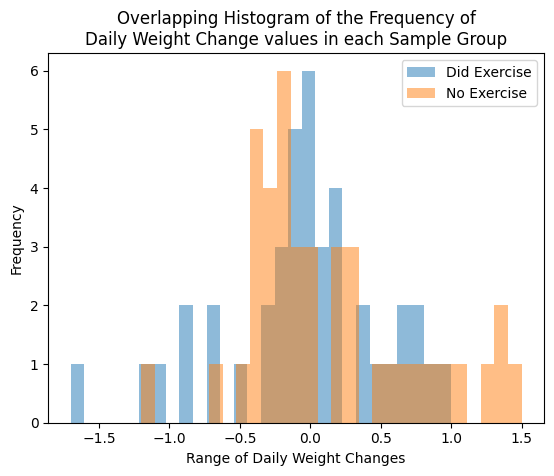

In [88]:
did_bins = (did_exercise_df["Daily Weight Change"].max() - did_exercise_df["Daily Weight Change"].min()) / 0.1
no_bins = (no_exercise_df["Daily Weight Change"].max() - no_exercise_df["Daily Weight Change"].min()) / 0.1
bins = int(max(did_bins, no_bins)) + 1
plt.hist(did_exercise_df["Daily Weight Change"], alpha=0.5, label="Did Exercise", bins=bins)
plt.hist(no_exercise_df["Daily Weight Change"], alpha=0.5, label="No Exercise", bins=bins)
plt.title("Overlapping Histogram of the Frequency of\nDaily Weight Change values in each Sample Group")
plt.xlabel("Range of Daily Weight Changes")
plt.ylabel("Frequency")
plt.legend()
plt.show()
plt.close()

### Box Plots

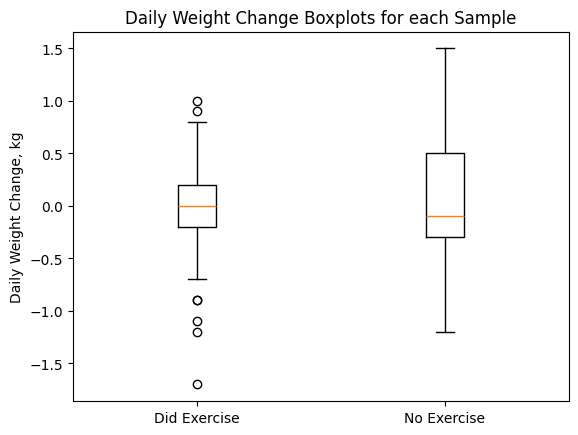

In [89]:
data = [did_exercise_df["Daily Weight Change"], no_exercise_df["Daily Weight Change"]]
plt.boxplot(data, tick_labels=["Did Exercise", "No Exercise"])
plt.title("Daily Weight Change Boxplots for each Sample")
plt.ylabel("Daily Weight Change, kg")
plt.show()
plt.close()

### Violin Plot

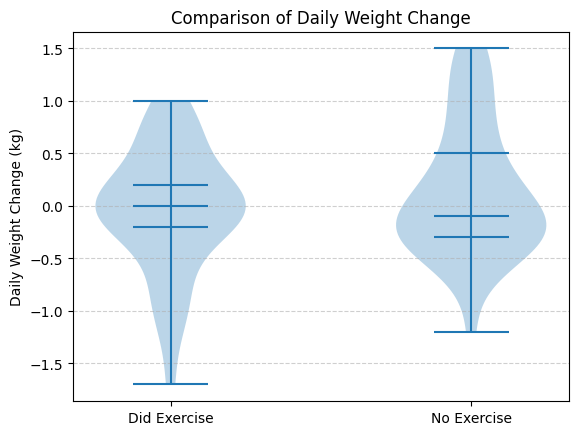

In [90]:
plt.violinplot(data, showmedians=True, quantiles=[[0.25, 0.75], [0.25, 0.75]])

plt.title("Comparison of Daily Weight Change")
plt.ylabel("Daily Weight Change (kg)")
plt.xticks([1, 2], labels=["Did Exercise", "No Exercise"])

plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.show()

# Test for Normality
Using the Shapiro-Wilk Test

In [91]:
# Did Exercise Group
statistic, p = shapiro(did_exercise_df["Daily Weight Change"])
print(f"{statistic=}\n{p=}")
print(f"The data appears to be normally distributed since the W statistic is ~0.95.\nThe p-value of ~0.10 supports" +
      " this conclusion because it is not statistically significant")

statistic=np.float64(0.954894574745304)
p=np.float64(0.10404803976812083)
The data appears to be normally distributed since the W statistic is ~0.95.
The p-value of ~0.10 supports this conclusion because it is not statistically significant


In [92]:
# No exercise group
statistic, p = shapiro(no_exercise_df["Daily Weight Change"])
print(f"{statistic=}\n{p=}")
print(f"Since the p-value is below my threshold of 0.05, I can reject the null hypothesis that the data is" +
      " normally distributed.\nBy rejecting it, I acknowledge that there is sufficient evidence to suggest that" +
      " the data in the no exercise sample group is not normally distributed")

statistic=np.float64(0.9231578695482393)
p=np.float64(0.008618190048391278)
Since the p-value is below my threshold of 0.05, I can reject the null hypothesis that the data is normally distributed.
By rejecting it, I acknowledge that there is sufficient evidence to suggest that the data in the no exercise sample group is not normally distributed


The group of records from days where I did exercise is likely to be normally distributed, whereas the group of records where I didn't do any exercise is unlikely to be normally distributed

# Test for Equal Variance

### Levene's Test

In [93]:
statistic, p = levene(did_exercise_df["Daily Weight Change"], no_exercise_df["Daily Weight Change"])
print(f"{statistic=:.3f}\n{p=:.3f}")
if p > 0.05:
      print(f"The Levene's test results indicate that the assumption of equal variances across the sample groups " +
      f"have been met.\nSince {p:.3f} is greater than the 0.05 significance level, I fail to reject the null hypothesis")

statistic=0.367
p=0.546
The Levene's test results indicate that the assumption of equal variances across the sample groups have been met.
Since 0.546 is greater than the 0.05 significance level, I fail to reject the null hypothesis


# Hypothesis Testing

### Man-Whitney U Test
Because one of the sample groups is not normally distributed, I have chosen to use the Mann-Whitney U Test. I'm going to use a significance level of a = 0.05

In [94]:
statistic, p = mannwhitneyu(did_exercise_df["Daily Weight Change"], no_exercise_df["Daily Weight Change"])
alpha = 0.05
if p < alpha:
    print(f"The test scored {p:.3f}. Using a significance level of {alpha}, we can reject the null hypothesis.")
else:
    print(f"The test scored {p:.3f}. Using a significance level of {alpha}, we fail to reject the null hypothesis.")

The test scored 0.756. Using a significance level of 0.05, we fail to reject the null hypothesis.


Calculating the Critical Value Manually

In [95]:
n1 = len(did_exercise_df)
n2 = len(no_exercise_df)
mean = (n1*n2)/2
std_dev = math.sqrt(( (n1*n2)*(n1+n2+1) )/ 12)
z_score = (statistic - mean) / std_dev
critical_z_value = 2* (1-norm.cdf(abs(z_score)))

if critical_z_value < alpha:
    print(f"The test scored {critical_z_value:.3f}. Using a significance level of {alpha}, we can reject the null hypothesis.")
else:
    print(f"The test scored {critical_z_value:.3f}. Using a significance level of {alpha}, we fail to reject the null hypothesis.")

The test scored 0.753. Using a significance level of 0.05, we fail to reject the null hypothesis.


# Additional Validation

### Distribution Shape and Location Comparison: Two-Sample Kolmogorov-Smirnov Test

In [96]:
statistic, p_value = ks_2samp(did_exercise_df["Daily Weight Change"], no_exercise_df["Daily Weight Change"])

if p_value < alpha:
    print(f"With a p_value of {p_value:.3f}, we can reject the null hypothesis. The distributions differ")
else:
    print(f"With a p value of {p_value:.3f}, we fail to reject the null hypothesis. There is no significant difference")

With a p value of 0.779, we fail to reject the null hypothesis. There is no significant difference


### Bootstrap Confidence Intervals: Difference in Medians

In [97]:
did_dataset = did_exercise_df["Daily Weight Change"]
no_dataset = no_exercise_df["Daily Weight Change"]
n1 = len(did_dataset)
n2 = len(no_dataset)
n_bootstraps = 10000
bootstrap_median_differences = []

for _ in range(n_bootstraps):
    did_sample = np.random.choice(did_dataset, size=n1, replace=True)
    no_sample = np.random.choice(no_dataset, size=n2, replace=True)
    
    difference = np.median(did_sample) - np.median(no_sample)
    bootstrap_median_differences.append(difference)

bootstrap_median_differences = np.array(bootstrap_median_differences)
lower_bound = np.percentile(bootstrap_median_differences, 2.5)
upper_bound = np.percentile(bootstrap_median_differences, 97.5)
        
bootstrap_median_difference = np.median(bootstrap_median_differences)
print(f"Bootstrap Difference in Medians: {bootstrap_median_difference=:.3f}")
print(f"{95}% Confidence Interval: {lower_bound=:.3f} / {upper_bound=:.3f}")

if lower_bound <= 0 <= upper_bound:
    print("CI includes zero, we fail to reject the null hypothesis that exercise affects body weight changes")
else:
    print("CI excludes zero, we can reject the null hypothesis. There is significant evidence that exercise affects body weight changes")
    

Bootstrap Difference in Medians: bootstrap_median_difference=0.100
95% Confidence Interval: lower_bound=-0.300 / upper_bound=0.300
CI includes zero, we fail to reject the null hypothesis that exercise affects body weight changes


### Mood’s Median Test

In [98]:
statistic, p, median, contingency_table = median_test(no_exercise_df["Daily Weight Change"], did_exercise_df["Daily Weight Change"])

print(f"Overall Median: {median}")

if p < 0.05:
    print(f"With a p-value of {p:.3f}, we can reject the null hypothesis. At least one group's median differs")
else:
    print(f"With a p value of {p:.3f}, we fail to reject the null hypothesis. All groups have the same median")

Overall Median: 0.0
With a p value of 1.000, we fail to reject the null hypothesis. All groups have the same median


### Brunner-Munzel Test

In [99]:
statistic, p = brunnermunzel(no_exercise_df["Daily Weight Change"], did_exercise_df["Daily Weight Change"])

if p < 0.05:
    print(f"With a p-value of {p:.3f}, we can reject the null hypothesis. One distribution tends to have larger values than the other")
else:
    print(f"With a p value of {p:.3f}, we fail to reject the null hypothesis. The two distributions are stochastically equal")

With a p value of 0.758, we fail to reject the null hypothesis. The two distributions are stochastically equal


# Effect Sizes

### Common Language Effect Size

In [100]:
u_stat, p = mannwhitneyu(did_exercise_df["Daily Weight Change"], no_exercise_df["Daily Weight Change"],  alternative="two-sided")

n1= len(no_exercise_df["Daily Weight Change"])
n2 = len(did_exercise_df["Daily Weight Change"])
cles = u_stat / (n1 * n2)

print(f"P-value: {p:.3f}")

if cles == 0.5:
    print("Both groups are indistinguishable")
elif cles > 0.5:
    print("Probability is that the did_exercise group is greater than the no_exercise group")
else:
    print("Probability is that the did_exercise group is less than the no_exercise group")

P-value: 0.756
Probability is that the did_exercise group is less than the no_exercise group


### Cliff's Delta

In [ ]:
def cliffs_delta(data1, data2):
    n1, n2 = len(data1), len(data2)
    count = 0
    for x_val in data1:
        for y_val in data2:
            if x_val > y_val:
                count += 1
            elif x_val < y_val:
                count -= 1
    return count / (n1 * n2)

delta = cliffs_delta(no_exercise_df["Daily Weight Change"], did_exercise_df["Daily Weight Change"])
print(f"Cliff's Delta: {delta:.3f}")
if delta == 0:
    print(f"There is no effect, {delta=}")
elif delta < 0:
    print(f"Values in the no exercise sample group tend to be smaller than those in the did exercise sample group ({delta})/-1")
elif delta > 0:
    print(f"Values in the no exercise sample group tend to be larger than those in the did exercise sample group ({delta}/1)")

Cliff's Delta: 0.040
